In [ ]:
import os
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_video import VideoFrameGenerator
import numpy as np

In [ ]:
# use sub directories names as classes
classes = [i.split(os.path.sep)[1] for i in glob.glob('Dataset/*')]
classes.sort()

# Some global params
SIZE = (128, 128)    # Image size
CHANNELS = 3         # Color channel
NBFRAME = 30         # Frames per video
BS = 8               # Batch size

# Pattern to get videos and classes
glob_pattern = 'Dataset/{classname}/*.mp4'

# For data augmentation
data_aug = ImageDataGenerator(
    zoom_range=.1,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)

# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split_val=.20,
    split_test=.20, 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=None, # Data Augmentation
    use_frame_cache=False)

class Agem_Kanan, validation count: 24, test count: 19, train count: 77
class Agem_Kiri, validation count: 24, test count: 19, train count: 77
class Ngegol, validation count: 24, test count: 19, train count: 77
class Nyalud, validation count: 24, test count: 19, train count: 77
class Nyeregseg, validation count: 24, test count: 19, train count: 77
class Seledet, validation count: 24, test count: 19, train count: 77
class Ulap_Ulap, validation count: 24, test count: 19, train count: 77
Total data: 7 classes for 539 files for train


In [ ]:
valid = train.get_validation_generator()
test = train.get_test_generator()

Total data: 7 classes for 168 files for validation
Total data: 7 classes for 133 files for test


In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
input_shape = (NBFRAME,) + SIZE + (CHANNELS,)

In [ ]:
# Define CNN model
model = Sequential()

model.add(TimeDistributed(Conv2D(64, (3,3), input_shape=input_shape[1:], padding='same', activation='relu'), input_shape=input_shape))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D()))

model.add(TimeDistributed(Conv2D(128, (3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D()))

model.add(TimeDistributed(Conv2D(256, (3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D()))

model.add(TimeDistributed(Conv2D(512, (3,3), padding='same', activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D()))

model.add(TimeDistributed(GlobalAveragePooling2D()))

# Define LSTM model
model.add(LSTM(256))

# Dense layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(int(len(classes)), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 30, 128, 128, 64)  1792      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 30, 128, 128, 64)  256       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 64, 64, 64)    0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 30, 64, 64, 128)   73856     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 30, 64, 64, 128)   512       
_________________________________________________________________
time_distributed_5 (TimeDist (None, 30, 32, 32, 128)   0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 30, 32, 32, 256)   2

In [ ]:
epochs = 100

earlystop = EarlyStopping(monitor='loss', patience=10)

callbacks = [earlystop]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(train,
                    validation_data=valid,
                    epochs=epochs,
                    callbacks=callbacks)

Epoch 1/100
67/67 [==============================] - 91s 1s/step - loss: 1.9132 - acc: 0.2379 - val_loss: 2.2377 - val_acc: 0.1369
Epoch 2/100
67/67 [==============================] - 69s 1s/step - loss: 1.6004 - acc: 0.2862 - val_loss: 2.1917 - val_acc: 0.1429
Epoch 3/100
67/67 [==============================] - 70s 1s/step - loss: 1.5889 - acc: 0.2920 - val_loss: 2.2405 - val_acc: 0.1429
Epoch 4/100
67/67 [==============================] - 70s 1s/step - loss: 1.5833 - acc: 0.3034 - val_loss: 2.2752 - val_acc: 0.1429
Epoch 5/100
67/67 [==============================] - 70s 1s/step - loss: 1.5810 - acc: 0.3086 - val_loss: 2.1446 - val_acc: 0.1786
Epoch 6/100
67/67 [==============================] - 69s 1s/step - loss: 1.6238 - acc: 0.2278 - val_loss: 2.1158 - val_acc: 0.1667
Epoch 7/100
67/67 [==============================] - 69s 1s/step - loss: 1.5613 - acc: 0.2636 - val_loss: 2.0037 - val_acc: 0.1905
Epoch 8/100
67/67 [==============================] - 70s 1s/step - loss: 1.5327 - a

In [ ]:
model.save(f'Model/tari/cnn-lstm-82e-8bs-20v20t.h5')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

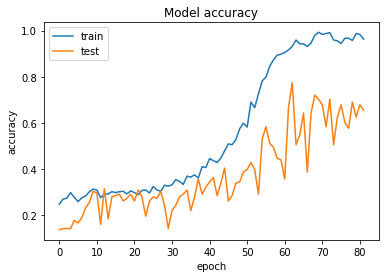

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

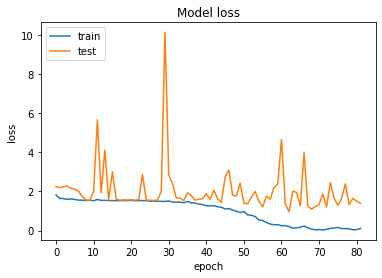

In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test)

16/16 [==============================] - 13s 813ms/step - loss: 1.6478 - acc: 0.6719


[1.6477751731872559, 0.671875]

In [ ]:
y_test = []
y_predict = []
for step in range(test.files_count//BS):
    X, y = test.next()
    prediction = model.predict(X)
    y_test.extend(y)
    y_predict.extend(prediction)

In [ ]:
y_true = np.argmax(y_test, axis=1)
prediction = np.argmax(y_predict, axis=1)

In [ ]:
y_true

array([0, 1, 3, 3, 1, 1, 5, 1, 1, 4, 4, 2, 2, 2, 6, 1, 5, 0, 0, 2, 2, 0,
       6, 5, 3, 3, 6, 3, 6, 0, 6, 6, 1, 3, 1, 5, 6, 1, 4, 0, 5, 3, 1, 3,
       5, 6, 5, 0, 2, 3, 4, 4, 3, 2, 6, 3, 6, 4, 0, 1, 4, 5, 6, 5, 4, 5,
       0, 0, 2, 3, 0, 5, 6, 5, 2, 3, 0, 5, 2, 2, 5, 3, 1, 1, 5, 5, 1, 4,
       4, 0, 2, 4, 0, 2, 1, 0, 4, 4, 4, 2, 1, 2, 6, 6, 0, 4, 1, 0, 4, 3,
       6, 2, 3, 4, 4, 1, 6, 5, 3, 2, 1, 4, 6, 0, 3, 3, 0, 2])

In [ ]:
prediction

array([0, 4, 3, 3, 1, 0, 5, 2, 2, 0, 4, 3, 2, 4, 6, 0, 5, 0, 0, 3, 3, 0,
       6, 5, 3, 6, 6, 3, 6, 0, 6, 6, 1, 3, 0, 5, 6, 0, 0, 0, 5, 6, 3, 3,
       5, 6, 5, 4, 2, 3, 4, 0, 3, 2, 6, 6, 3, 4, 0, 1, 0, 5, 6, 5, 4, 5,
       0, 0, 2, 3, 0, 5, 6, 5, 2, 3, 0, 5, 3, 3, 5, 6, 0, 1, 5, 5, 2, 4,
       4, 4, 3, 4, 0, 2, 3, 0, 0, 4, 3, 2, 0, 2, 3, 6, 0, 4, 0, 0, 0, 3,
       6, 3, 3, 4, 4, 0, 6, 5, 6, 2, 1, 0, 6, 4, 4, 3, 0, 3])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, \
roc_curve, auc

In [ ]:
target_names = test.classes
print(classification_report(y_true, prediction, target_names=target_names))

              precision    recall  f1-score   support

  Agem_Kanan       0.52      0.84      0.64        19
   Agem_Kiri       1.00      0.26      0.42        19
      Ngegol       0.75      0.50      0.60        18
      Nyalud       0.50      0.68      0.58        19
   Nyeregseg       0.65      0.58      0.61        19
     Seledet       1.00      1.00      1.00        17
   Ulap_Ulap       0.75      0.88      0.81        17

    accuracy                           0.67       128
   macro avg       0.74      0.68      0.67       128
weighted avg       0.73      0.67      0.66       128



In [ ]:
matrix = confusion_matrix(y_true, prediction)
matrix

array([[16,  0,  0,  0,  3,  0,  0],
       [ 8,  5,  3,  2,  1,  0,  0],
       [ 0,  0,  9,  8,  1,  0,  0],
       [ 0,  0,  0, 13,  1,  0,  5],
       [ 7,  0,  0,  1, 11,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  2,  0,  0, 15]])

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, prediction)
print(f'Accuracy: {accuracy}')
# precision tp / (tp + fp)
precision = precision_score(y_true, prediction, average='macro')
print(f'Precision: {precision}')
# recall: tp / (tp + fn)
recall = recall_score(y_true, prediction, average='macro')
print(f'Recall: {recall}')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, prediction, average='macro')
print(f'F1 score: {f1}')

Accuracy: 0.671875
Precision: 0.7375982651124966
Recall: 0.6786819991154357
F1 score: 0.6651951951951952


In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, prediction, pos_label=6)
auc = auc(fpr, tpr)

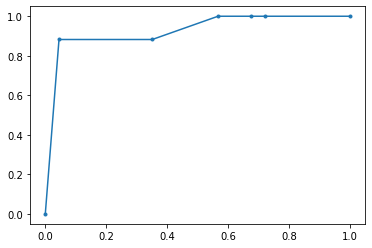

In [ ]:
plt.plot(fpr, tpr, marker='.')
plt.show()